<a href="https://colab.research.google.com/github/arumshin-dev/python_conda_jupyter/blob/main/codeit/%EB%AF%B8%EC%85%983.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 스프린트 미션 3
## 자전거 대여 시스템 데이터 분석

### **미션 배경**

여러분이 자전거 대여 시스템의 운영 담당자라고 상상해 보세요. 여러분의 목표는 자전거 대여 패턴을 분석하여 자전거 배치 및 운영 전략을 최적화하고, 대여 수요를 정확히 예측하는 것입니다. 이를 통해 대여 시스템의 효율성을 높이고 사용자 만족도를 증가시키는 방법을 찾는 것이 이번 미션의 핵심입니다.

이번 미션의 최종 목표는 RMSLE (Root Mean Squared Logarithmic Error)를 최대한 낮추는 것입니다. 다양한 머신러닝 모델과 전략을 실험하여 가장 정확한 수요 예측 모델을 개발하고, 그 결과를 보고서에 담아 보세요!

### **RMSLE ( Root Mean Squared Logarithmic Error )**
 예측 값과 실제 값의 차이를 로그 변환하여 계산한 후, 그 차이의 제곱 평균의 제곱근을 구한 값입니다. 이 지표는 예측 오차를 측정하는 데 사용되며, 특히 큰 값보다 작은 값의 오차를 더 중요시하는 경우에 유용합니다. 이는 예측 값이 실제 값보다 훨씬 클 때 더 큰 패널티를 부과하므로, 예측 값이 과대평가되는 것을 방지하는 데 효과적입니다.

- RMSLE의 장점
    1. **안정성**: 예측 값과 실제 값이 모두 0에 가까울 때도 로그 변환을 통해 안정적인 값이 나옵니다.
    2. **과대평가 방지**: 예측 값이 실제 값보다 훨씬 클 때 더 큰 패널티를 부과합니다. 이는 과대평가를 방지하고 모델의 신뢰성을 높이는 데 도움이 됩니다.
- 다른 지표와의 비교
    - **MAE (Mean Absolute Error)**: 예측 값과 실제 값의 차이의 절대값의 평균을 계산합니다. MAE는 모든 오차를 동일하게 취급합니다.
    - **MSE (Mean Squared Error)**: 예측 값과 실제 값의 차이의 제곱의 평균을 계산합니다. MSE는 큰 오차에 더 큰 페널티를 부과합니다.
    - **RMSE (Root Mean Squared Error)**: MSE의 제곱근으로, 여전히 큰 오차에 더 큰 페널티를 부과하지만 원래 단위로 돌아옵니다.

    이처럼, RMSLE는 큰 예측 오류를 더 큰 패널티로 처리하여 과대평가를 방지하고, 예측 모델의 신뢰성을 높이는 데 도움을 줍니다. 자전거 대여 수요 예측과 같이 값이 다양한 문제에서 특히 유용합니다.
        

### **데이터 소개**

- train.csv

| **컬럼명** | **데이터 타입** | **설명** |
| --- | --- | --- |
| **datetime** | **datetime** | **자전거 대여 기록의 날짜 및 시간. 예시: 2011-01-01 00:00:00** |
| **season** | **int** | **계절 (1: 봄, 2: 여름, 3: 가을, 4: 겨울)** |
| **holiday** | **int** | **공휴일 여부 (0: 평일, 1: 공휴일)** |
| **workingday** | **int** | **근무일 여부 (0: 주말/공휴일, 1: 근무일)** |
| **weather** | **int** | **날씨 상황 (1: 맑음, 2: 구름낌/안개, 3: 약간의 비/눈, 4: 폭우/폭설)** |
| **temp** | **float** | **실측 온도 (섭씨)** |
| **atemp** | **float** | **체감 온도 (섭씨)** |
| **humidity** | **int** | **습도 (%)** |
| **windspeed** | **float** | **풍속 (m/s)** |
| **casual** | **int** | **등록되지 않은 사용자의 대여 수** |
| **registered** | **int** | **등록된 사용자의 대여 수** |
| **count** | **int** | **총 대여 수 (종속 변수)** |

> train.csv 파일에는 count 컬럼이 포함되어 있으며, 예측 대상인 종속 변수입니다.test.csv 파일에는 casual, registered, count 컬럼이 포함되어 있지 않습니다.casual과 registered는 자전거 대여 수요를 예측하는데 참고하실만한 자료이며, count는 두 컬럼간의 합입니다.
>


In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

fm.fontManager.addfont(path)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

#0 라이브러리

In [2]:
# # 데이터 처리
import pandas as pd # 데이터 조작
import numpy as np  # 수치 계산

import matplotlib.pyplot as plt # 시각화
import seaborn as sns   # 고급 시각화

# # 날짜
# import calendar
from datetime import datetime

# # 머신러닝 모델 및 평가 지표
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures,StandardScaler
from sklearn.pipeline import make_pipeline                                                              # 다항 회귀시 오류때문에 필요

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error

# # 경고 무시
# import warnings
# warnings.filterwarnings(action='ignore')

#1 데이터 로드

In [3]:
# 데이터 불러오기
train = pd.read_csv("https://bakey-api.codeit.kr/api/files/resource?root=static&seqId=10724&version=2&directory=/train%2520(1).csv&name=train%2520(1).csv")
test = pd.read_csv("https://bakey-api.codeit.kr/api/files/resource?root=static&seqId=10724&version=2&directory=/test%2520(1).csv&name=test%2520(1).csv")
# 훈련데이터 확인
print('='*15,'train head','='*15)
display(train.head())
# 테스트 데이터 확인
print('\n','='*15,'test head','='*15)
display(test.head())

=============== train head ===============


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1



 =============== test head ===============


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


#2 데이터 기초 탐색

In [4]:
train.info() # 컬럼별 데이터 타입 및 값의 개수, 결측 여부 파악

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [6]:
# 결측치 확인
print('train 결측:',train.isna().sum().sum())
print('test 결측:',test.isna().sum().sum())

train 결측: 0
test 결측: 0


In [7]:
# 중복 데이터 확인
print('train 중복:',train.duplicated().sum())
print('test 중복:',test.duplicated().sum())

train 중복: 0
test 중복: 0


In [8]:
# train 데이터 통계
train.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [9]:
# test 데이터 통계
test.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
unique,6493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2012-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,NaN,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,NaN,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,NaN,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,NaN,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900


- datetime type 변경해야한다.
- 결측치 없다
- 중복 없다
- train과 test의 datetime 다름
- 수치형 컬럼 humidity 최소 다름. temp,atemp,windspeed 평균,최소,최대 비슷하다.


#3 타깃 분석
- count 전체
- casual 비회원
- registered 회원


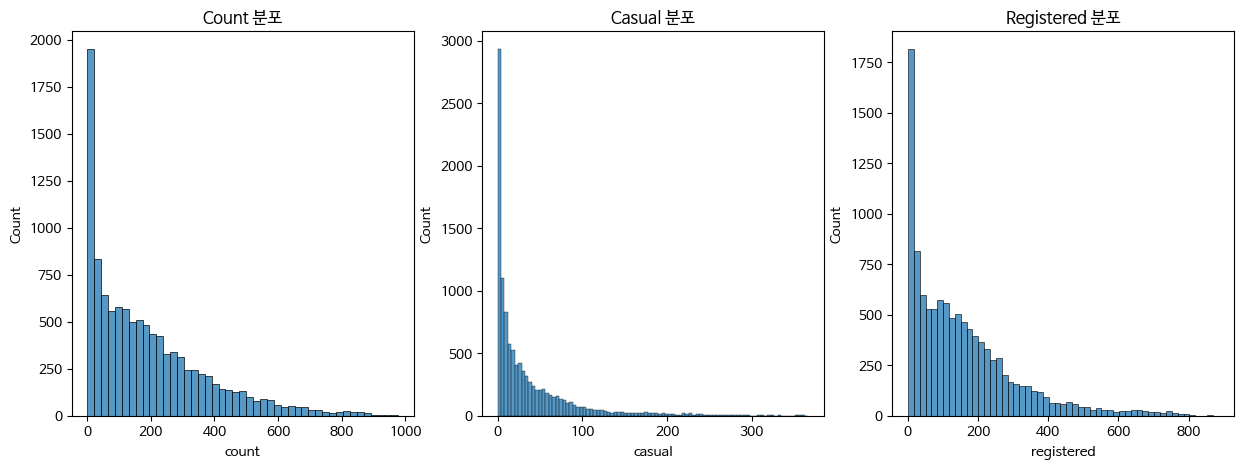

In [10]:
# 타깃 count 분석
# 타겟 변수 분포 확인(정규분포,왜도,극단값 등)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(train['count'])
plt.title('Count 분포')

plt.subplot(1, 3, 2)
sns.histplot(train['casual'])
plt.title('Casual 분포')

plt.subplot(1, 3, 3)
sns.histplot(train['registered'])
plt.title('Registered 분포')
plt.show()

- 우편향 분포(꼬리가 오른쪽으로 길다) -> 로그 변환 고려

## 수치형 변수와 count의 관계

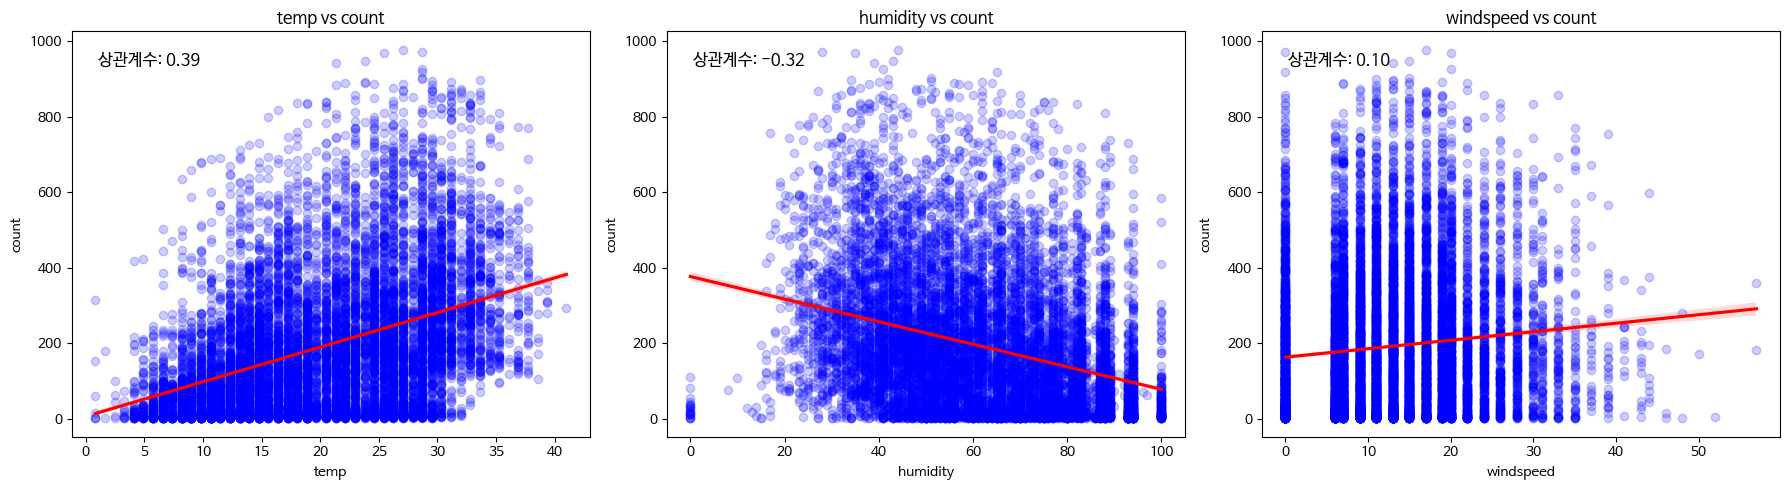

In [11]:

num_cols = ['temp', 'humidity', 'windspeed']

plt.figure(figsize=(18, 5))

for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i + 1)
    sns.regplot(x=train[col], y=train['count'],
                scatter_kws={'alpha':0.2, 'color':'blue'}, # 점
                line_kws={'color':'red'} # 선
                )
    plt.title(f'{col} vs count')
    plt.xlabel(col)
    plt.ylabel('count')

    # 상관계수 계산 및 표시
    correlation = train[col].corr(train['count'])
    plt.text(0.05, 0.95, f'상관계수: {correlation:.2f}',
             transform=plt.gca().transAxes, fontsize=12,
             verticalalignment='top')

plt.tight_layout()
plt.show()

temp (실측 온도) 0.39 양의 상관관계

humidity (습도) -0.32 음의 상관관계

windspeed (풍속) 0.10 매우 약한 양의 상관관계


## 범주형 변수와 count의 관계

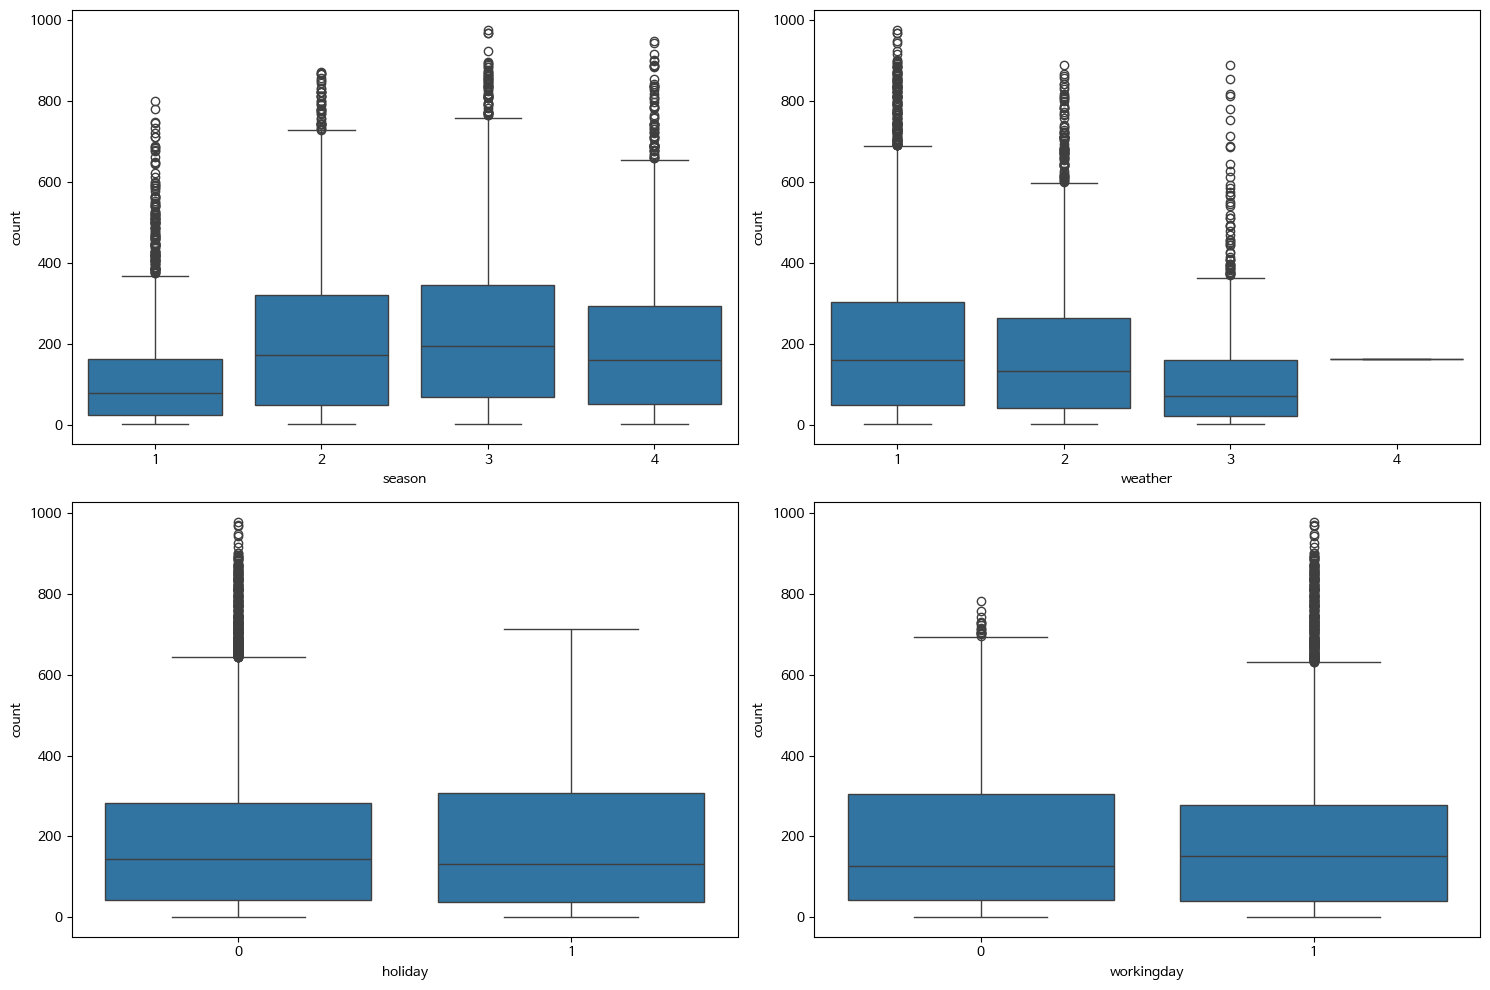

In [12]:
# 날씨별, 계절별 자전거 이용량
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(data=train, x='season', y='count', ax=axes[0,0])
sns.boxplot(data=train, x='weather', y='count', ax=axes[0,1])
sns.boxplot(data=train, x='holiday', y='count', ax=axes[1,0])
sns.boxplot(data=train, x='workingday', y='count', ax=axes[1,1])

plt.tight_layout()
plt.show()

- Season (계절)
    - 1 봄 가장 낮다
    - 2 여름, 3 가을 대여량 많다
    - 4 겨울 중간

- Weather (날씨)
    - 1 맑음 가장 많다
    - 2 구름/안개 두번째 많다
    - 3 약간 비/눈 대여량 작다
    - 4 폭우/폭설 거의없다
- Holiday
    - 0 평일 대여량 > 1 공휴일 대여량 중앙값이 낮다
    - 평일에 더 많이탐

- Workingday
    - 0 주말/공휴일 < 1 근무일 대여량
    - 중앙값이 약간 높고 분포 넓고 최대 대여량 높다


#4 가설 수립

| 가설 | 내용 |
|------|------|
| H1 | 온도가 높을수록 대여량 증가 |
| H2 | 습도가 높을수록 대여량 감소 |
| H3 | 여름/가을에 대여량 높음 |
| H4 | 근무일에 대여량 높음 |
| H5 | 날씨가 나쁠수록 대여량 감소 |

1. 특정 시간대의 자전거 대여 패턴은 무엇인가요?
2. 날씨 변수와 자전거 대여 수요 간의 상관관계는 무엇인가요?
3. 계절별 자전거 대여 패턴의 차이는 무엇인가요?
4. 주말과 평일의 자전거 대여 수요 차이는 무엇인가요?
5. 자전거 대여 수요를 예측하기 위해 사용할 수 있는 가장 중요한 변수는 무엇인가요?
6. 자전거 대여 수요 예측 모델을 구축하고, 이를 기반으로 한 운영 전략을 제안해보세요.


#5 EDA 및 전처리(중복, 결측, 이상치 시각화 포함)

## 종속변수 로그 변환

In [13]:
train["log_count"] = np.log1p(train["count"])                 # log1p: 0이나 작은 값에서의 수치 안정성을 위해 log(1 + x)를 더 정확히 계산해주는 함수. count==0일때 좋음.
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,log_count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2.833213
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,3.713572
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,3.496508
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2.639057
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0.693147


## *datetime 변수 분리 → 파생 변수 생성 (train & test 모두)

In [14]:
# 시간 관련 파생 변수 추가 함수
def add_time_features(df):
    df = df.copy()
    df['datetime'] = pd.to_datetime(df['datetime'])  # 문자열 → datetime 객체
    df['hour'] = df['datetime'].dt.hour              # 시간
    df['day'] = df['datetime'].dt.day                # 일 (1~31)
    df['month'] = df['datetime'].dt.month            # 월
    df['year'] = df['datetime'].dt.year              # 연도
    df['dayofweek'] = df['datetime'].dt.dayofweek    # 요일 (0=월 ~ 6=일)
    # df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)
    # df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    # df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
# is_weekend, rush_hour, season_category,사인/코사인 주기 처리
    return df

train = add_time_features(train)
test = add_time_features(test)

# hour: 0~23 인지 확인
print("hour 범위:", train['hour'].min(), "to", train['hour'].max())

# dayofweek: 0(월) ~ 6(일)
print("dayofweek 범위:", train['dayofweek'].min(), "to", train['dayofweek'].max())

# month: 1~12
print("month 범위:", train['month'].min(), "to", train['month'].max())

# day: 일수가 28~31인지 확인
print("day 범위:", train['day'].min(), "to", train['day'].max())

# year: 몇 년도까지 있는지
print("year 값들:", train['year'].unique())

hour 범위: 0 to 23
dayofweek 범위: 0 to 6
month 범위: 1 to 12
day 범위: 1 to 19
year 값들: [2011 2012]


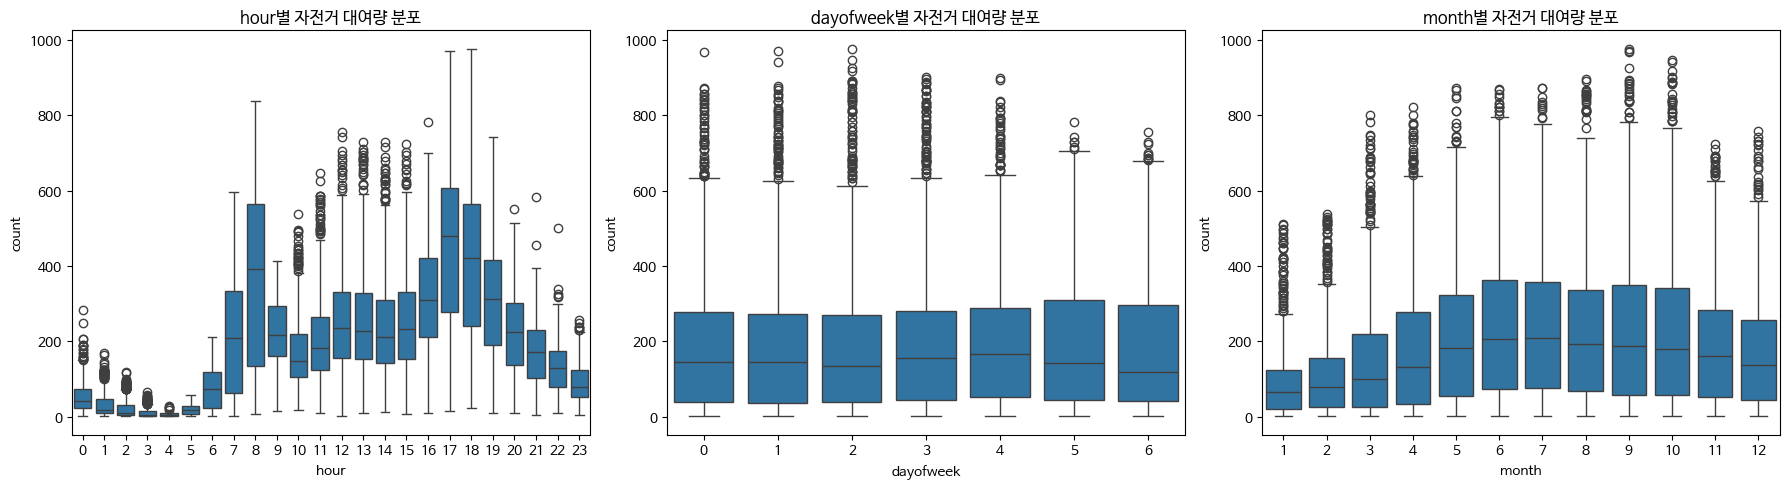

In [15]:
cat_cols = ['hour', 'dayofweek', 'month']

plt.figure(figsize=(18, 5))

for i, col in enumerate(cat_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=train, x=col, y='count')
    plt.title(f'{col}별 자전거 대여량 분포')
    plt.xlabel(col)
    plt.ylabel('count')

plt.tight_layout()
plt.show()

# 시간대별 자전거 이용량
# sns.boxplot(data=train, x='hour', y='count')
# plt.title('시간대별 자전거 이용량')
# plt.show()


1. hour (시간)별 자전거 대여량 분포
    - 출퇴근 시간대 많다. 8시, 17,18시 가장많다.
    - 새벽 0~5시 거의 없다.
    - 12시 점심시간대 약간 있다.
    - 대부분 시간에 이상치가 있다. 특별한 날
    
    → 출퇴근 시간에 집중된 수요: 직장인 이용자가 많다는 걸 암시

2. dayofweek (요일)별 자전거 대여량 분포

    요일별로 큰 차이는 없음, 전체적으로 비슷함

    다만, **토요일(5), 일요일(6)**은 상한값이 좀 더 높은 경향

    중앙값은 평일이 더 높거나 비슷

    → 전체적인 수요는 주중과 주말 모두 있는 편, 주말엔 일부 사용자들이 더 많이 빌리는 경향도 있음

3. month (월)별 자전거 대여량 분포

    1~2월: 수요가 가장 낮음 → 겨울철

    5~9월: 대여량이 높고 안정적 → 여름철 피크

    10월 이후 다시 감소

    → 계절성 뚜렷. 따뜻한 계절에 자전거 이용이 활발하다는 걸 보여줌

---
- 시간대 구간화: rush_hour = (hour == 8) | (hour.between(17,18))
- 주기성 표현: hour_sin = np.sin(2*pi*hour/24)
- 근무시간 구분: work_time = hour.between(9,18)


## 결측치, 중복 확인

In [16]:
# 결측치 확인
print('train 결측:',train.isna().sum().sum())
print('test 결측:',test.isna().sum().sum())

# 중복 데이터 확인
print('train 중복:',train.duplicated().sum())
print('test 중복:',test.duplicated().sum())

train 결측: 0
test 결측: 0
train 중복: 0
test 중복: 0


결측치,중복 확인 및 없음

## 이상치 탐색: 박스플롯을 통한 시각화


### 수치형 변수 boxplot

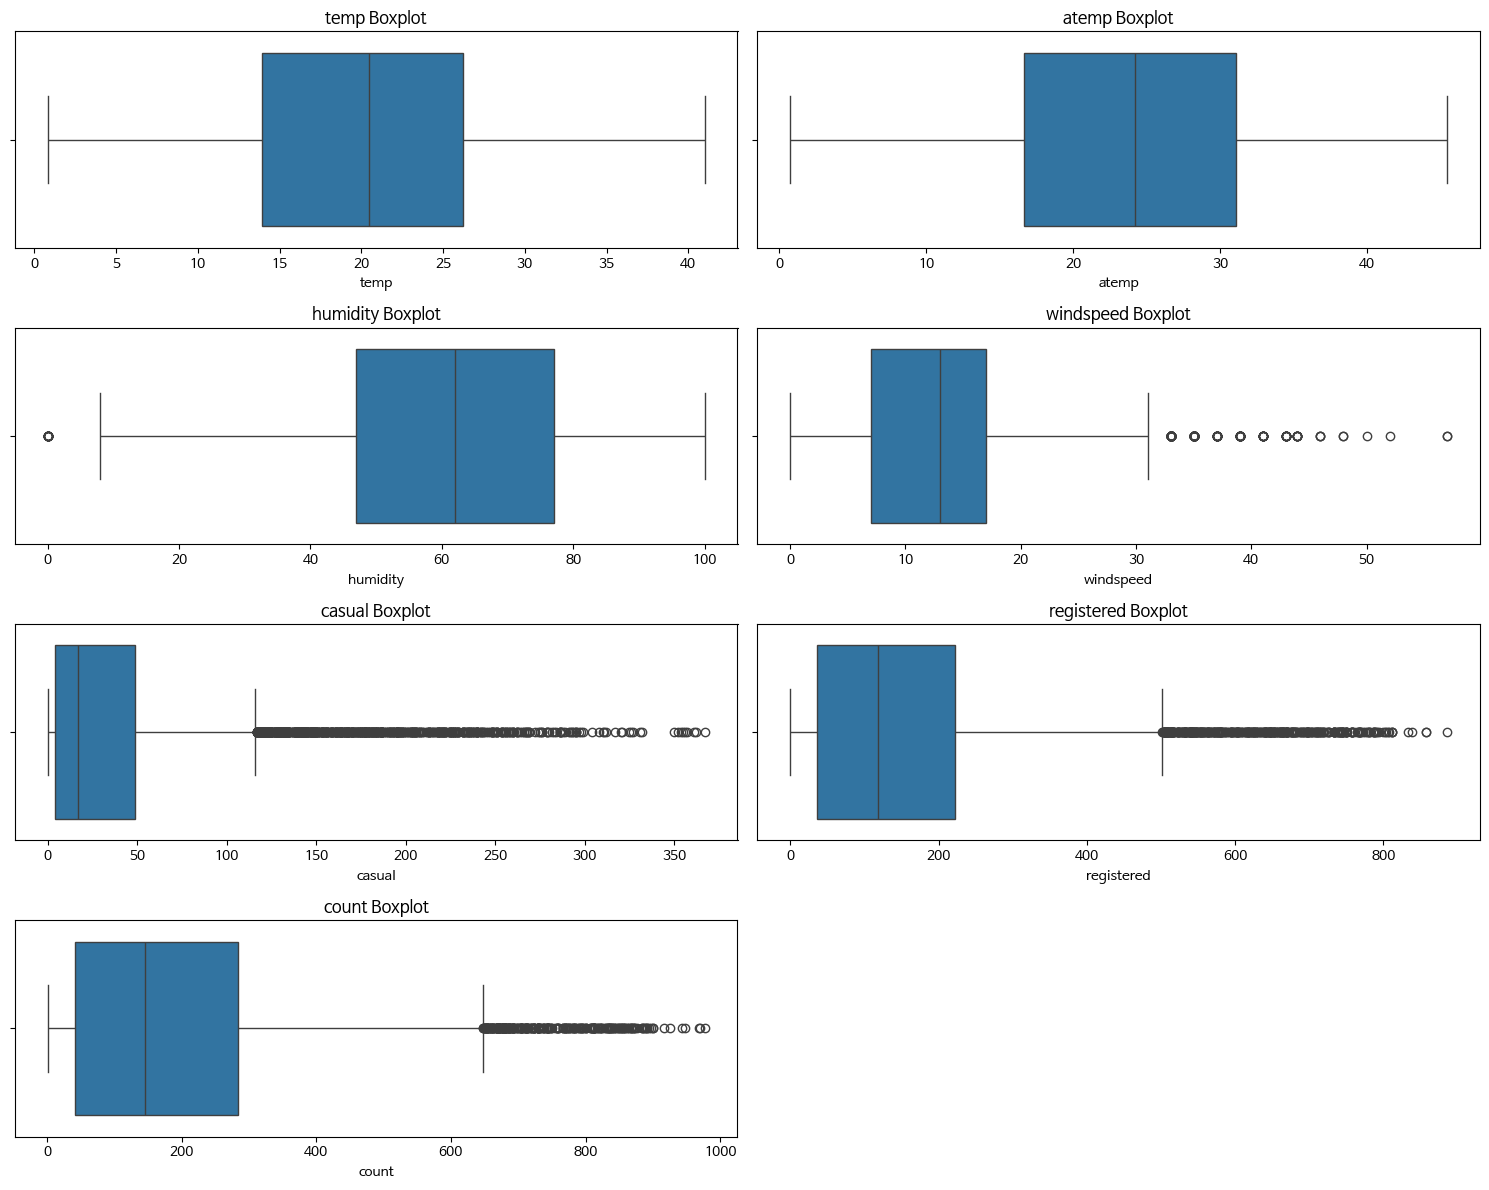

In [17]:
numeric_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=train[col]) # 가로 박스 플롯
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()


#### humidity


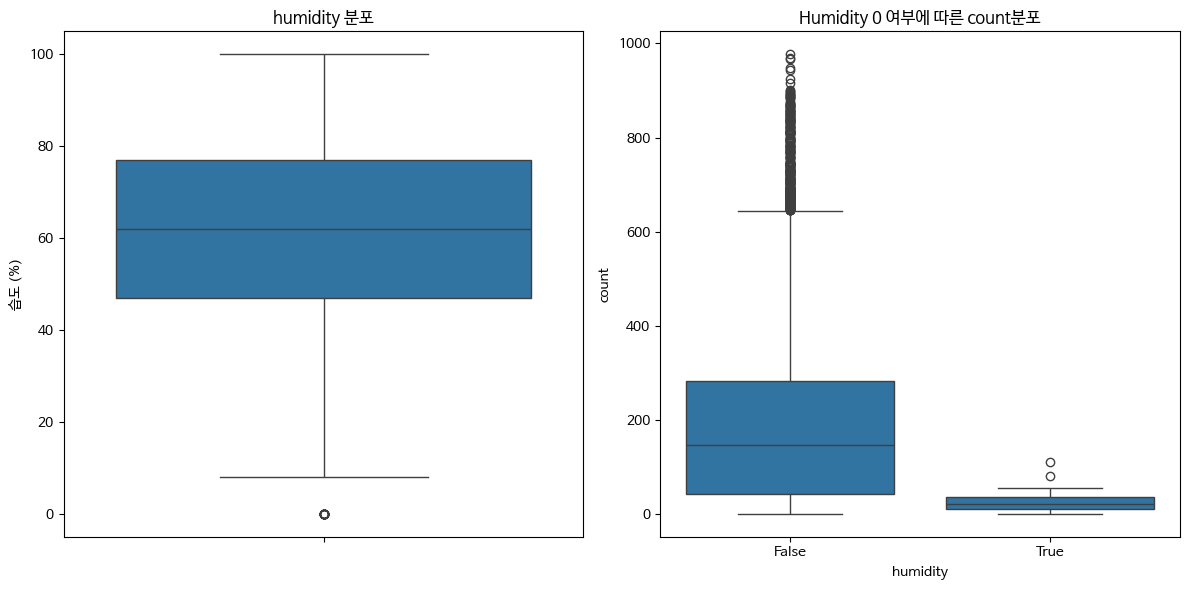

humidity 이상치 데이터 수: 22
humidity 이상치 값: [0]
humidity 이상치 값 수: 1


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,log_count,hour,day,month,year,dayofweek
1091,2011-03-10 00:00:00,1,0,1,3,13.94,15.910,0,16.9979,3,0,3,1.386294,0,10,3,2011,3
1092,2011-03-10 01:00:00,1,0,1,3,13.94,15.910,0,16.9979,0,2,2,1.098612,1,10,3,2011,3
1093,2011-03-10 02:00:00,1,0,1,3,13.94,15.910,0,16.9979,0,1,1,0.693147,2,10,3,2011,3
1094,2011-03-10 05:00:00,1,0,1,3,14.76,17.425,0,12.9980,1,2,3,1.386294,5,10,3,2011,3
1095,2011-03-10 06:00:00,1,0,1,3,14.76,16.665,0,22.0028,0,12,12,2.564949,6,10,3,2011,3
1096,2011-03-10 07:00:00,1,0,1,3,15.58,19.695,0,15.0013,1,36,37,3.637586,7,10,3,2011,3
1097,2011-03-10 08:00:00,1,0,1,3,15.58,19.695,0,19.0012,1,43,44,3.806662,8,10,3,2011,3
1098,2011-03-10 09:00:00,1,0,1,3,16.40,20.455,0,15.0013,1,23,24,3.218876,9,10,3,2011,3
1099,2011-03-10 10:00:00,1,0,1,3,16.40,20.455,0,11.0014,0,17,17,2.890372,10,10,3,2011,3
1100,2011-03-10 11:00:00,1,0,1,3,16.40,20.455,0,16.9979,6,5,11,2.484907,11,10,3,2011,3


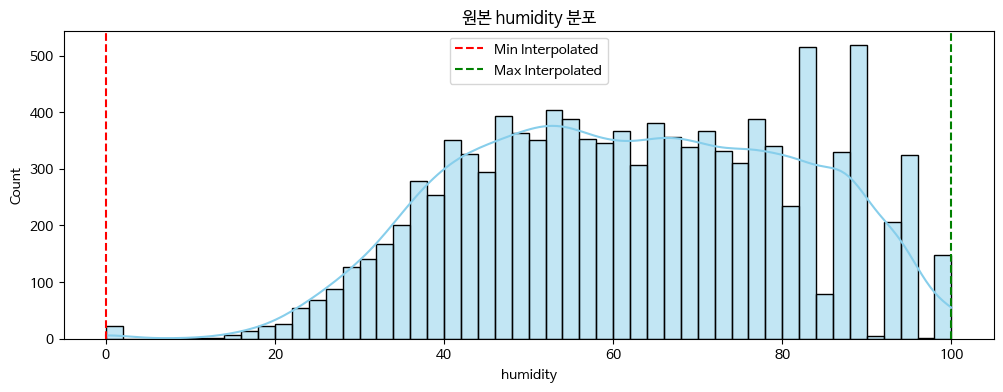

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# 습도 이상치
sns.boxplot(data=train, y='humidity', ax=axes[0])
axes[0].set_title('humidity 분포')
axes[0].set_ylabel('습도 (%)')

sns.boxplot(data=train, x=(train['humidity'] == 0),y='count', ax=axes[1])
axes[1].set_title('Humidity 0 여부에 따른 count분포')

plt.tight_layout()
plt.show()

def detect_outliers_iqr(data, column):
    # 1. Q1 (25%)와 Q3 (75%) 구하기
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    # 2. IQR 기반 이상치 범위 계산
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # 3. 이상치 판별
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outliers, low, high = detect_outliers_iqr(train, 'humidity')
print(f"humidity 이상치 데이터 수: {len(outliers)}")
print(f"humidity 이상치 값: {outliers['humidity'].unique()}")
print(f"humidity 이상치 값 수: {outliers['humidity'].nunique()}")
display(outliers)

plt.figure(figsize=(12, 4))
sns.histplot(train['humidity'], bins=50, kde=True, color='skyblue')
plt.title('원본 humidity 분포')
plt.axvline(train['humidity'].min(), color='red', linestyle='--', label='Min Interpolated')
plt.axvline(train['humidity'].max(), color='green', linestyle='--', label='Max Interpolated')
plt.legend()
plt.show()

2011년 3월 10일 0~23시 전체 습도 0 은 오류로 보임. 9일 23시 ~ 11일 0시 사이의 정수 값들로 이상치를 보간한다.

In [19]:
# humidity가 0인 경우 NaN 처리
train['humidity'] = train['humidity'].replace(0, np.nan)

# 2. 선형 또는 시간 보간 (1시간 간격이므로 linear도 가능)
train['humidity'] = train['humidity'].interpolate(method='linear')

# 3. 정수형으로 복구 (선택사항)
train['humidity'] = train['humidity'].round().astype(int)

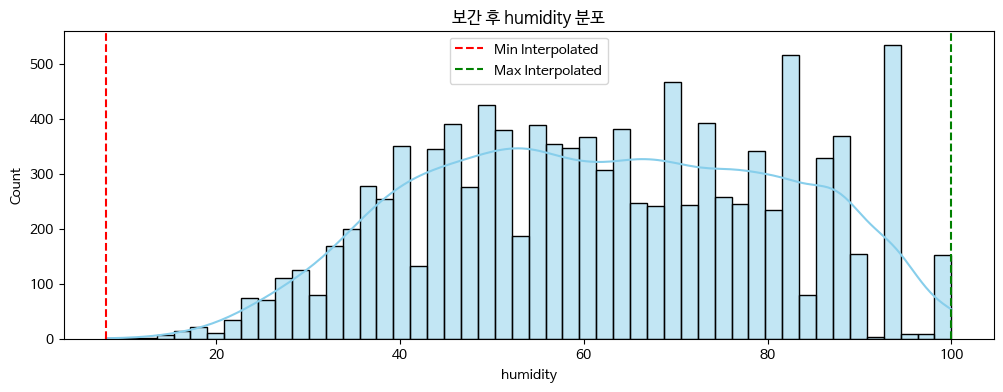

In [20]:
plt.figure(figsize=(12, 4))
sns.histplot(train['humidity'], bins=50, kde=True, color='skyblue')
plt.title('보간 후 humidity 분포')
plt.axvline(train['humidity'].min(), color='red', linestyle='--', label='Min Interpolated')
plt.axvline(train['humidity'].max(), color='green', linestyle='--', label='Max Interpolated')
plt.legend()
plt.show()


#### windspeed


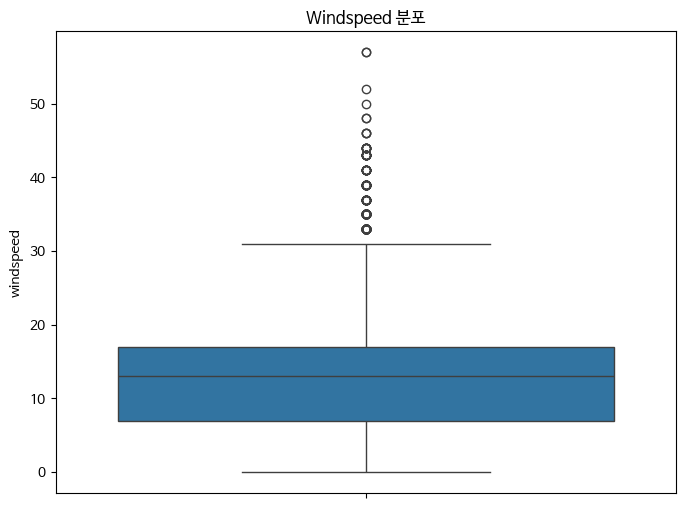

windspeed 이상치 데이터 수: 227
windspeed 이상치 값: [32.9975 36.9974 35.0008 39.0007 43.9989 40.9973 51.9987 46.0022 50.0021
 43.0006 56.9969 47.9988]
windspeed 이상치 값 수: 12


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,log_count,hour,day,month,year,dayofweek
175,2011-01-08 14:00:00,1,0,0,1,8.20,8.335,32,32.9975,12,83,95,4.564348,14,8,1,2011,5
178,2011-01-08 17:00:00,1,0,0,1,6.56,6.060,37,36.9974,5,64,69,4.248495,17,8,1,2011,5
194,2011-01-09 09:00:00,1,0,0,1,4.92,3.790,46,35.0008,0,19,19,2.995732,9,9,1,2011,6
196,2011-01-09 11:00:00,1,0,0,1,6.56,6.060,40,35.0008,2,47,49,3.912023,11,9,1,2011,6
265,2011-01-12 12:00:00,1,0,1,1,8.20,7.575,47,39.0007,3,52,55,4.025352,12,12,1,2011,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10013,2012-11-02 14:00:00,4,0,1,2,16.40,20.455,40,32.9975,63,199,262,5.572154,14,2,11,2012,4
10154,2012-11-08 12:00:00,4,0,1,1,16.40,20.455,24,32.9975,33,202,235,5.463832,12,8,11,2012,3
10263,2012-11-13 01:00:00,4,0,1,3,18.04,21.970,88,43.0006,0,5,5,1.791759,1,13,11,2012,1
10540,2012-12-05 14:00:00,4,0,1,1,19.68,23.485,33,32.9975,39,179,218,5.389072,14,5,12,2012,2


In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=train, y='windspeed')
plt.title('Windspeed 분포')
plt.ylabel('windspeed')
plt.show()

outliers, low, high = detect_outliers_iqr(train, 'windspeed')
print(f"windspeed 이상치 데이터 수: {len(outliers)}")
print(f"windspeed 이상치 값: {outliers['windspeed'].unique()}")
print(f"windspeed 이상치 값 수: {outliers['windspeed'].nunique()}")
display(outliers)

In [22]:
train['windspeed'].value_counts().sort_index()
train[train['windspeed']>45]
# windspeed 45 이상 2월(5),7월(2),3월(1),4월(1)에 발생  허리케인이나 태풍 아닐까 해서 이상치 제거 안함.
# test 데이터의 max도 55.9986이었다.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,log_count,hour,day,month,year,dayofweek
760,2011-02-15 01:00:00,1,0,1,1,12.30,12.120,42,51.9987,0,5,5,1.791759,1,15,2,2011,1
761,2011-02-15 02:00:00,1,0,1,1,11.48,11.365,41,46.0022,1,2,3,1.386294,2,15,2,2011,1
868,2011-02-19 15:00:00,1,0,0,1,18.04,21.970,16,50.0021,84,87,171,5.147494,15,19,2,2011,5
2755,2011-07-03 17:00:00,3,0,0,3,32.80,37.120,49,56.9969,181,177,358,5.883322,17,3,7,2011,6
2756,2011-07-03 18:00:00,3,0,0,3,32.80,37.120,49,56.9969,74,107,181,5.204007,18,3,7,2011,6
6141,2012-02-12 03:00:00,1,0,0,2,4.10,2.275,46,46.0022,0,14,14,2.708050,3,12,2,2012,6
6142,2012-02-12 04:00:00,1,0,0,2,4.10,2.275,46,47.9988,0,1,1,0.693147,4,12,2,2012,6
6513,2012-03-08 15:00:00,1,0,1,1,26.24,31.060,38,46.0022,24,161,185,5.225747,15,8,3,2012,3
6988,2012-04-09 12:00:00,2,0,1,1,22.14,25.760,28,47.9988,94,186,280,5.638355,12,9,4,2012,0


## 상관관계 히트맵


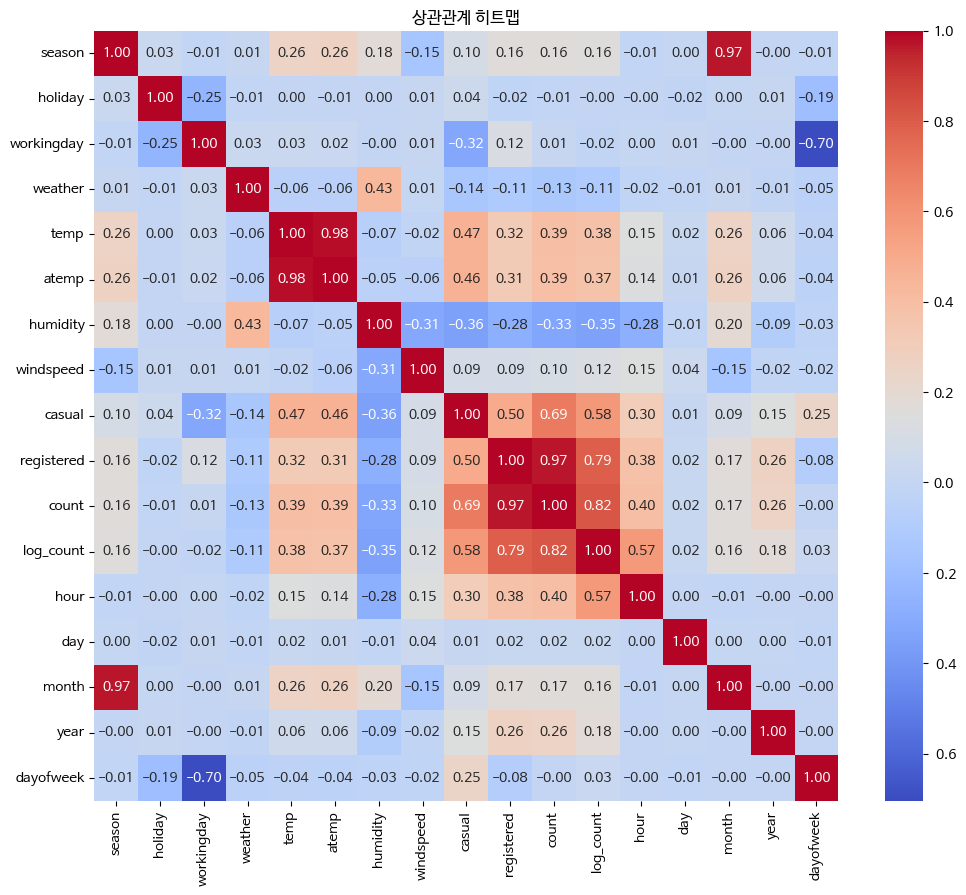

In [23]:
# 상관관계 히트맵
corr = train.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('상관관계 히트맵')
plt.show()


- 타겟 변수 count 와의 상관관계

    registered : 0.97 → 거의 완벽한 양의 상관관계 → 강력한 예측 변수

    casual : 0.69 → 높은 양의 상관관계

    hour : 0.40 양의 상관관계

    temp : 0.39, atemp : 0.39 → 어느 정도 양의 상관관계 (추울수록 대여량 감소)

    humidity : -0.33 → 음의 상관관계 있음 (습할수록 대여량 줄어듦)

    windspeed : 0.10 → 매우 약한 상관관계 → 거의 영향 없음

- 파생 변수 간 상관관계

    temp vs atemp : 0.98 → 거의 동일한 값 → 다중공선성 주의 둘 중 하나만 사용

    casual vs registered : 0.50 → 중간 정도의 상관관계
    → 타겟인 count는 이 둘의 합이므로 두 변수의 존재는 논리적으로 필요


### *중복 변수 제거
- 다중공선성 의심 변수

    temp, atemp : 0.98 atemp 제거

    holiday, workingday : -0.25 둘다 이진 변수라서 논리적으로 반대 관계 -1.00	 (하나는 휴일이면 다른 하나는 평일 아님)

    season, month : 0.97 중복성 있음 → 비슷하지만 역할이 다름


In [24]:
# 중복 제거 변수 리스트
drop_cols = ['atemp']
# 변수 제거
train = train.drop(columns=drop_cols)
test = test.drop(columns=drop_cols)

#7 모델 학습 및 검증

## 데이터 준비

In [25]:

features = ['season', 'holiday', 'workingday', 'weather', 'temp',
           'humidity', 'windspeed', 'hour', 'day', 'month', 'year', 'dayofweek']
y = train['count']

results_single_features = []

for feature in features:
    X_single = train[[feature]]
    X_train_s, X_val_s, y_train_s, y_val_s = train_test_split(X_single, y, test_size=0.2, random_state=42)

    model_single = LinearRegression()
    model_single.fit(X_train_s, y_train_s)
    y_pred_single = model_single.predict(X_val_s)

    # 성능 지표 계산
    mae = mean_absolute_error(y_val_s, y_pred_single)
    mse = mean_squared_error(y_val_s, y_pred_single)
    rmse = np.sqrt(mse)
    rmsle = np.sqrt(mean_squared_log_error(y_val_s, np.maximum(0, y_pred_single)))
    r2 = r2_score(y_val_s, y_pred_single)

    results_single_features.append({
        'Feature': feature,
        'Coefficient': model_single.coef_[0],  # 단순화
        'Intercept': model_single.intercept_,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'RMSLE': rmsle,
        'R2': r2
    })

# 결과 출력
results_df = pd.DataFrame(results_single_features).sort_values(by='RMSLE', ascending=True)
print("\n=== 단일 피처별 성능 랭킹 (RMSLE 기준) ===")
print(results_df.round(3))



# 다중 선형회귀 - 모든 변수 사용
# 🔧 수정 부분: datetime 컬럼 제외
X_multi = train[features]

X_train_m, X_val_m, y_train_m, y_val_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)
y_pred_multi = model_multi.predict(X_val_m)


def evaluate_model(y_true, y_pred, model_name):
    # 🔧 수정 부분: RMSLE 계산 시 예측값 음수 방지
    y_pred_cleaned = np.maximum(0, y_pred) # 예측값 음수 방지


    # 기본 지표들
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)


    # RMSLE (Root Mean Squared Log Error) 계산
    rmsle = np.sqrt(mean_squared_log_error(y_true, y_pred_cleaned))


    print(f"\n=== {model_name} 성능 ===")
    print(f"MAE:   {mae:.3f}")
    print(f"MSE:   {mse:.3f}")
    print(f"RMSE:  {rmse:.3f}")
    print(f"RMSLE: {rmsle:.3f}")
    print(f"R²:    {r2:.3f}")


    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'RMSLE': rmsle, 'R²': r2}


print("\n=== 다중 선형 회귀 ===")
# 각 변수의 계수 확인
# 🔧 수정 부분: 다중 회귀 모델의 계수 출력
if hasattr(model_multi, 'coef_') and len(model_multi.coef_) == len(features):
    for feature, coef in zip(features, model_multi.coef_):
        print(f"{feature}: {coef:.2f}")
else:
    print("다중 회귀 모델의 계수를 가져올 수 없습니다.")


multi_results = evaluate_model(y_val_m, y_pred_multi, "다중 선형회귀")


=== 단일 피처별 성능 랭킹 (RMSLE 기준) ===
       Feature  Coefficient   Intercept      MAE        MSE     RMSE  RMSLE  \
7         hour       10.501      70.323  125.837  27812.111  166.770  1.354   
4         temp        9.065       7.855  125.152  27419.993  165.590  1.443   
5     humidity       -3.120     385.041  132.021  29531.845  171.848  1.499   
10        year       93.915 -188717.639  136.806  30702.742  175.222  1.557   
9        month        8.659     135.083  139.069  31977.850  178.824  1.561   
0       season       26.130     126.058  139.264  32022.604  178.949  1.563   
6    windspeed        2.181     163.674  141.981  32602.419  180.561  1.577   
3      weather      -37.432     244.616  141.008  32545.434  180.404  1.578   
8          day        0.563     185.974  142.619  32981.670  181.609  1.587   
1      holiday       -8.770     191.841  142.731  33012.048  181.692  1.587   
11   dayofweek       -0.447     192.935  142.711  33010.449  181.688  1.587   
2   workingday     

#8 해석 및 인사이트

*가설* 검증: hour, temp가 중요하다
 “기온이 높을수록 수요가 증가한다”는 가설이 지지된 것.

#9 액션 플랜 제안 (Action Plan)

수요 예측 활용: 출퇴근 시간대에 자전거 추가 배치


# 여러 모델

# (1) 1차 모델 feature_1

In [26]:
# 모델링 타겟 변수 지정
features_1=['season', 'holiday', 'workingday', 'weather', 'temp',
            'humidity', 'windspeed', 'hour', 'day', 'month', 'year', 'dayofweek']

In [27]:

X_train = train[features_1]
y_train = train['count']
# 테스트 데이터도 위의 타깃 변수만 지정함
# X_test = test[features_1]

# 학습/검증 분할
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 회귀 모델 정의

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1),
    "Lasso": Lasso(alpha=10),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.1),
    "Polynomial_2nd": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    "Polynomial_3rd": make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
}

# 모델 학습 및 평가
results_ = []

for name, model in models.items():
    model.fit(X_train, y_train)
    # y_pred = model.predict(X_val)
    y_pred = np.maximum(0, model.predict(X_val))  # 음수 제거- 예측 값 음수 문제 방지

    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))
    r2 = r2_score(y_val, y_pred)

    results_.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "RMSLE": rmsle,
        "R제곱" : r2
    })

# 모델 결과 확인
results_ = pd.DataFrame(results_)
results_


,Model,MAE,MSE,RMSE,RMSLE,R제곱
0,LinearRegression,103.258390,19654.919905,140.196005,1.304124,0.404522
1,Ridge,103.257050,19654.982641,140.196229,1.304070,0.404520
2,Lasso,103.606872,20203.061070,142.137472,1.257053,0.387915
3,ElasticNet,103.171491,19662.719585,140.223820,1.300541,0.404285
4,Polynomial_2nd,86.321958,14010.547606,118.366159,1.408243,0.575527
5,Polynomial_3rd,76.365068,11814.224728,108.693260,1.278880,0.642068


Polynomial 3차 모델이 가장 좋은 성능
기본 선형, 릿지, 라쏘보다 훨씬 나은 성능

Lasso 회귀
- 가장 낮은 R² (0.388) → 설명력 낮음
- RMSE, MSE도 가장 높음
- RMSLE만 상대적으로 좋음 (1.26) → 이건 예측값이 전반적으로 낮게 나온 걸로 볼 수도 있어

In [28]:
# 데이터 지정
X1_train = train[features_1]
y1_train = train["log_count"]
# 테스트 데이터도 위의 타깃 변수만 지정함
X1_test = test[features_1]

# 학습/검증 분할
X1_train, X1_val, y1_train, y1_val = train_test_split(X1_train, y1_train, test_size=0.2, random_state=42)

# 회귀 모델 정의

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1),
    "Lasso": Lasso(alpha=10),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.1),
    "Polynomial_2nd": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    "Polynomial_3rd": make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
}

# 모델 학습 및 평가
results_1 = []

for name, model in models.items():
    model.fit(X1_train, y1_train)
    y1_pred_log = model.predict(X1_val)
    y1_pred = np.expm1(y1_pred_log)                                     # np.expm1: 로그 역변환
    y1_true = np.expm1(y1_val)

    mae = mean_absolute_error(y1_true, y1_pred)
    mse = mean_squared_error(y1_true, y1_pred)
    rmse = np.sqrt(mean_squared_error(y1_true, y1_pred))
    rmsle = np.sqrt(mean_squared_log_error(y1_true, y1_pred))
    r2 = r2_score(y1_true, y1_pred)

    results_1.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "RMSLE": rmsle,
        "R제곱" : r2
    })

# 모델 결과 확인
results_1 = pd.DataFrame(results_1)
results_1


,Model,MAE,MSE,RMSE,RMSLE,R제곱
0,LinearRegression,107.190588,25510.562097,159.720262,1.021308,0.227115
1,Ridge,107.190277,25510.590382,159.720351,1.021306,0.227114
2,Lasso,143.060850,41779.920256,204.401370,1.434800,-0.265792
3,ElasticNet,107.191295,25533.722667,159.792749,1.021194,0.226413
4,Polynomial_2nd,75.187230,15051.635692,122.685108,0.866685,0.543986
5,Polynomial_3rd,77.965639,15769.648058,125.577259,0.787721,0.522232


MAE, RMSE, R² 기준: Polynomial_2nd가 가장 뛰어남
→ 전체적으로 예측값이 가장 정확하고 안정적

RMSLE 기준: Polynomial_3rd가 가장 낮음 (로그 오차 적음)
→ 실제값과 예측값의 비율 차이에선 3차가 조금 더 나았다는 뜻

#(2) 2차 모델링

In [29]:
!pip install catboost

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.svm import SVR

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [30]:

# 회귀 모델 정의
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1),
    "Lasso": Lasso(alpha=10),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.1),
    "Polynomial_2nd": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    "Polynomial_3rd": make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),

    # 추가 모델들
    "DecisionTree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "SVR": SVR(C=1.0, epsilon=0.2),

    # 부스팅 계열
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, verbosity=0),
    "LightGBM": LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    "CatBoost": CatBoostRegressor(iterations=100, learning_rate=0.1, depth=5, verbose=0, random_state=42)
}


def evaluate_models(X_train, y_train, X_val, y_val, models, use_log=False):
    """
    다양한 회귀 모델을 학습하고 성능을 평가합니다.
    """
    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        # y_pred_log = model.predict(X_val)
        # y_pred = np.expm1(y_pred_log)
        y_pred = model.predict(X_val)

        # 로그 변환된 타겟이면 역변환
        if use_log:
            y_pred_original = np.expm1(y_pred)  # 원본 스케일로 역변환
            y_true_original = np.expm1(y_val)   # 원본 스케일로 역변환

            # 음수 방지
            y_pred_original = np.maximum(0, y_pred_original)

            # 모든 지표를 원본 스케일에서 계산
            mae = mean_absolute_error(y_true_original, y_pred_original)
            mse = mean_squared_error(y_true_original, y_pred_original)
            rmse = np.sqrt(mse)
            rmsle = np.sqrt(mean_squared_log_error(y_true_original, y_pred_original))
            r2 = r2_score(y_true_original, y_pred_original)
        else:
            # 원본 데이터는 그대로
            y_pred = np.maximum(0, y_pred)  # 음수 방지
            mae = mean_absolute_error(y_val, y_pred)
            mse = mean_squared_error(y_val, y_pred)
            rmse = np.sqrt(mse)
            rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))
            r2 = r2_score(y_val, y_pred)

        results.append({
            "Model": name,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "RMSLE": rmsle,
            "R2": r2
        })

    return pd.DataFrame(results).sort_values(by="RMSLE")


# 1) 원본 타겟 (log 변환 안한 상태)
X_train, X_val, y_train, y_val = train_test_split(train[features_1], train['count'], test_size=0.2, random_state=42)
results_original = evaluate_models(X_train, y_train, X_val, y_val, models, use_log=False)

# 2) 로그 변환 타겟
train['log_count'] = np.log1p(train['count'])
X_train2, X_val2, y_train2, y_val2 = train_test_split(train[features_1], train['log_count'], test_size=0.2, random_state=42)
results_log = evaluate_models(X_train2, y_train2, X_val2, y_val2, models, use_log=True)

# 3) 피처 조합 변경 (예: month, day, year 빼고 해보기)
features_subset = ['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed', 'hour', 'dayofweek']
X_train3, X_val3, y_train3, y_val3 = train_test_split(train[features_subset], train['log_count'], test_size=0.2, random_state=42)
results_subset = evaluate_models(X_train3, y_train3, X_val3, y_val3, models, use_log=True)

# 결과 출력
print("원본 타겟 결과\n", results_original)
print("\n로그 변환 타겟 결과\n", results_log)
print("\n피처 서브셋 결과\n", results_subset)



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 239
[LightGBM] [Info] Number of data points in the train set: 8708, number of used features: 12
[LightGBM] [Info] Start training from score 191.584750
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

로그 변환 GradientBoosting  제일 좋다